In [32]:
# Module
import pandas as pd
import numpy as np
import os
import re
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import missingno as msno
import warnings
from plotnine import *

In [33]:
# Setting Warning MSG
warnings.filterwarnings(action = "ignore")

# Setting DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.options.display.float_format = '{:,.0f}'.format

# Setting Font
mpl.rcParams['axes.unicode_minus'] = False
data = np.random.randint(-100, 100, 50).cumsum()

print(f'폰트 설치 위치 : {mpl.__file__}')
print(f'폰트 설정 위치 : {mpl.get_configdir()}')
print(f'폰트 캐시 위치 : {mpl.get_cachedir()}')
print(f'폰트 설정 파일 위치 : {mpl.matplotlib_fname()}')
print(f'현재 폰트 / 사이즈 : {plt.rcParams["font.family"]} / {plt.rcParams["font.size"]}')

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf') 
nanum_font_list = [_ for _ in font_list if 'Nanum' in _]

font_path = nanum_font_list[0]

## Check Font

폰트 설치 위치 : c:\Python38\lib\site-packages\matplotlib\__init__.py
폰트 설정 위치 : C:\Users\reot1\.matplotlib
폰트 캐시 위치 : C:\Users\reot1\.matplotlib
폰트 설정 파일 위치 : c:\Python38\lib\site-packages\matplotlib\mpl-data\matplotlibrc
현재 폰트 / 사이즈 : ['Nanum Brush Script'] / 18.0


Text(0.5, 0, '시간(분)')

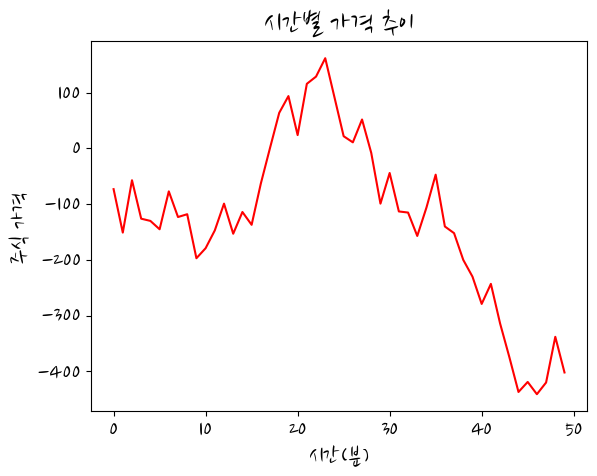

In [34]:
# fm.FontProperties
fontprop = fm.FontProperties(fname=font_path, size=18)

data = np.random.randint(-100,100,50).cumsum()
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

Text(0.5, 0, '시간(분)')

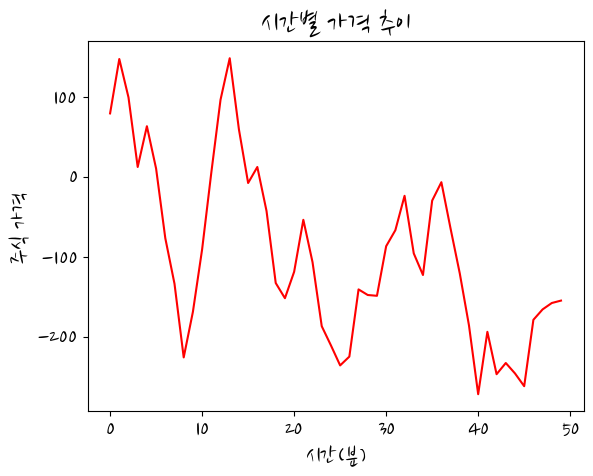

In [35]:
# global font
plt.rcParams['font.family'] = 'Nanum Brush Script'
plt.rcParams['font.size'] = 18

data = np.random.randint(-100,100,50).cumsum()
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

In [36]:
# Load Data
os.listdir('./../Input_data')
pre_sale = pd.read_csv('./../Input_data/전국_평균_분양가격_2018.6월_.csv', encoding='cp949')
pre_sale.shape

(2805, 5)

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    131
dtype: int64
  지역명               규모구분    연도   월 분양가격(㎡)
0  서울                 전체  2015  10    5841
1  서울         전용면적 60㎡이하  2015  10    5652
2  서울   전용면적 60㎡초과 85㎡이하  2015  10    5882
3  서울  전용면적 85㎡초과 102㎡이하  2015  10    5721
4  서울        전용면적 102㎡초과  2015  10    5879
     지역명               규모구분    연도  월 분양가격(㎡)
2800  제주                 전체  2018  6    3925
2801  제주         전용면적 60㎡이하  2018  6    5462
2802  제주   전용면적 60㎡초과 85㎡이하  2018  6    3639
2803  제주  전용면적 85㎡초과 102㎡이하  2018  6     NaN
2804  제주        전용면적 102㎡초과  2018  6    3029
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      2805 non-null   object
 1   규모구분     2805 non-null   object
 2   연도       2805 non-null   int64 
 3   월        2805 non-null   int64 
 4   분양가격(㎡)  2674 non-null   object
dtypes: int64(2), o

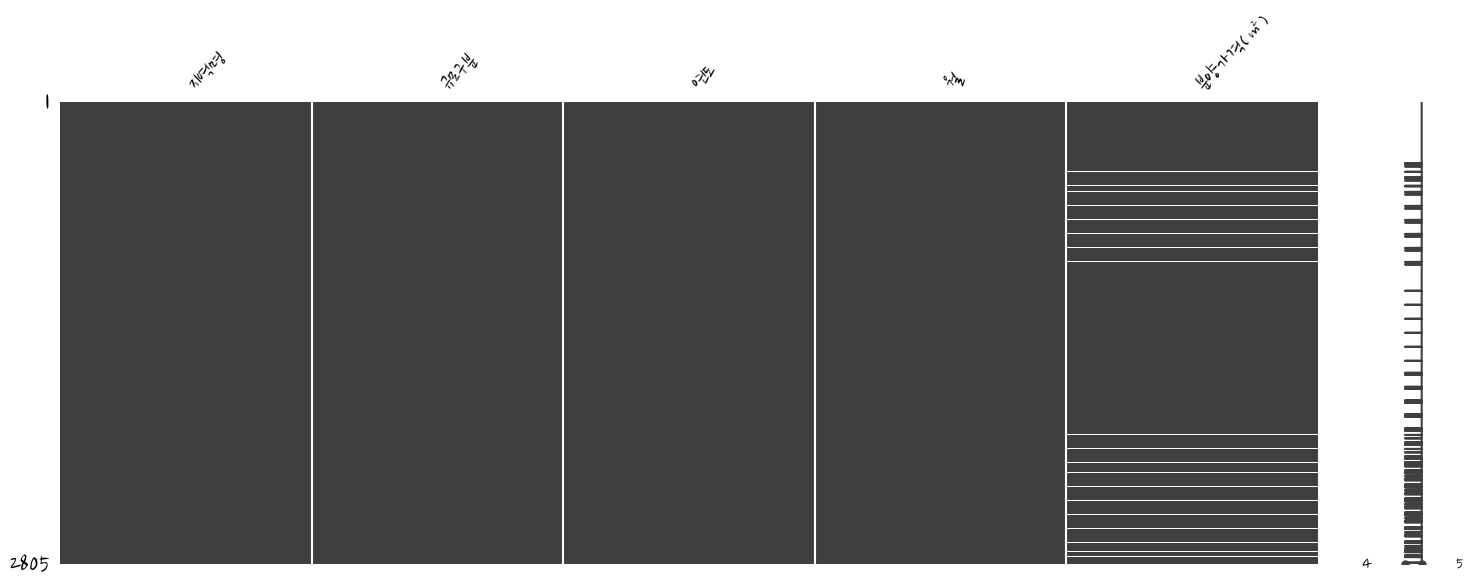

In [37]:
# 결측치 확인
print(pre_sale.isnull().sum())
# missingno 시각화
msno.matrix(pre_sale, figsize=(18,6)) # 분양가격에 결측치 존재

# Basic Information
print(pre_sale.head())
print(pre_sale.tail())
print(pre_sale.info())

# 분양 가격의 데이터 타입 : object ; => int
# 연도, 월에 대한 데이터 타입 변경 : int =>  str
pre_sale_price = pre_sale.iloc[:, -1]
type(pre_sale_price)

pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')

# 평당 분양 가격 컬럼 추가
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

# 결측치 재확인
print(pre_sale.isnull().sum()) # 뷴양가격을 수치화 하면서 Nan 값 증가

In [38]:
# 세부 데이터 확인
# 분양 가격에 대한 컬럼(수치형) 데이터 요약통계량 확인
print(pre_sale.describe())

# 수치형이 아닌 데이터 컬럼에 대해서 확인
print(pre_sale.describe(include=[np.object]))

# 2017년도 데이터 확인
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape 

# 연도별 기준 전국 평균 분양 가격 확인(요약통계량)
pre_sale.groupby(pre_sale.연도).describe().T

# 규모별 기준 전국 평균 분양가격 확인(평당분양가격, 연도 관련 피벗테이블 생성)
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

# 규모가 전체로 되어있는 금액으로 연도별 변동금액 확인
# 연도별 각 지역의 변동액 확인
region_year_all = pre_sale.loc[pre_sale['규모구분']=='전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year['변동액(2015~2018)'] = (region_year['2018'] - region_year['2015']).astype(int)
region_year = region_year.sort_values(['변동액(2015~2018)']).reset_index(drop=True)
region_year = region_year.rename(columns={'변동액(2015~2018)': '변동액'})

low_region = region_year.iloc[0,np.r_[0,-1]]
high_region = region_year.iloc[-1,np.r_[0,-1]]

print(f'\n2015년에서 2018년 지역별 변동액\n가장 큰 곳 : {low_region["지역명"]}\n변동액 : {low_region["변동액"]}(천원)\n가장 적은 곳 : {high_region["지역명"]}\n변동액 : {high_region["변동액"]}(천원)')

       분양가격  평당분양가격
count 2,582   2,582
mean  3,057  10,087
std   1,110   3,663
min   1,868   6,164
25%   2,339   7,719
50%   2,738   9,037
75%   3,289  10,854
max   8,098  26,723
         지역명  규모구분    연도     월 분양가격(㎡)
count   2805  2805  2805  2805    2674
unique    17     5     4    12    1278
top       서울    전체  2016    10    2221
freq     165   561  1020   255      17

2015년에서 2018년 지역별 변동액
가장 큰 곳 : 울산
변동액 : 387(천원)
가장 적은 곳 : 제주
변동액 : 5335(천원)


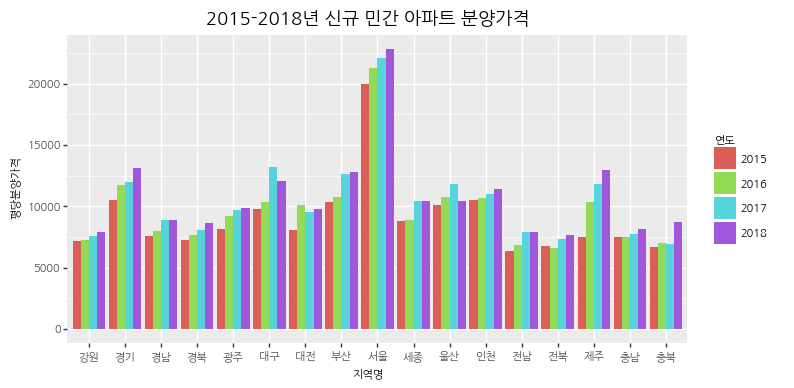

<ggplot: (179660025308)>

In [39]:
# 연도별 변동 그래프 시각화
fontprop = fm.FontProperties(fname=font_path, size=8)
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(fontproperties=fontprop),
         figure_size=(8,4))
)

In [40]:
# 지역별 평당 분양 가격 합계
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,871","13,601","9,222","8,586","10,381","12,303","14,282","12,584","22,035","9,259","9,974","13,836","7,550","7,793","10,435","8,477","7,900"
전용면적 60㎡이하,"7,185","12,300","8,320","7,646","8,494","11,254","8,816","10,656","21,976","9,071","8,965","10,853","6,980","7,184","14,700","7,772","6,951"
전용면적 60㎡초과 85㎡이하,"7,216","11,650","8,088","7,657","9,159","10,889","8,779","11,135","20,718","9,237","10,651","10,719","6,943","6,868","9,908","7,484","7,019"
전용면적 85㎡초과 102㎡이하,"7,612","12,029","9,834","8,776","9,296","9,497","9,037","10,971","23,714","9,210","8,861","11,286","7,858","7,739","10,744","9,102","8,145"
전체,"7,183","11,664","8,113","7,661","9,151","10,854","8,854","11,241","21,127","9,230","10,628","10,727","6,958","6,877","10,230","7,474","6,966"


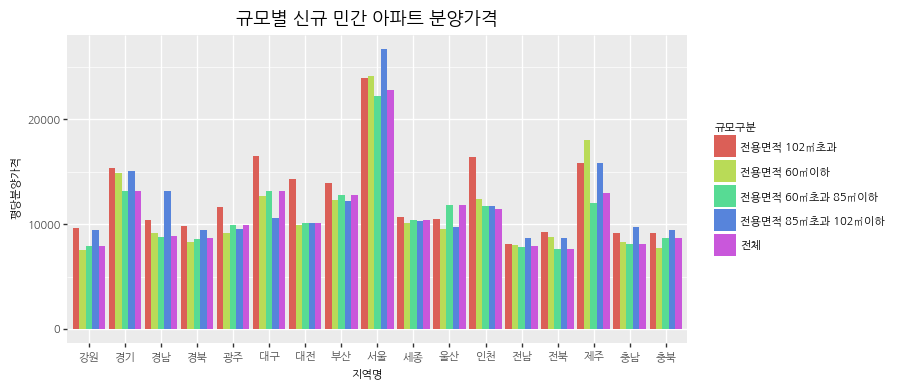

<ggplot: (179660532953)>

In [41]:
# 규모별 지역 평당 분양 가격 시각화
fontprop = fm.FontProperties(fname=font_path, size=8)
(ggplot(pre_sale)
 + aes(x='지역명', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(fontproperties=fontprop),
         figure_size=(8,4))
 )

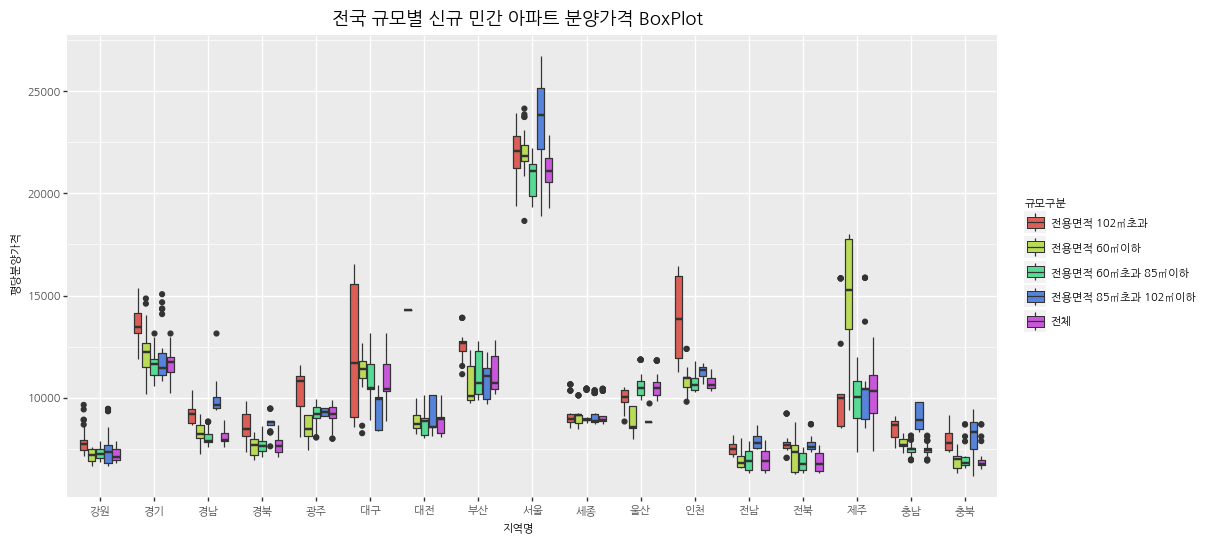

<ggplot: (179660453726)>

In [42]:
# 전국 이상치 확인 시각화 ; BoxPlot
(ggplot(pre_sale)
 + aes(x='지역명', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격 BoxPlot')
 + theme(text=element_text(fontproperties=fontprop),
         figure_size=(12, 6))
)

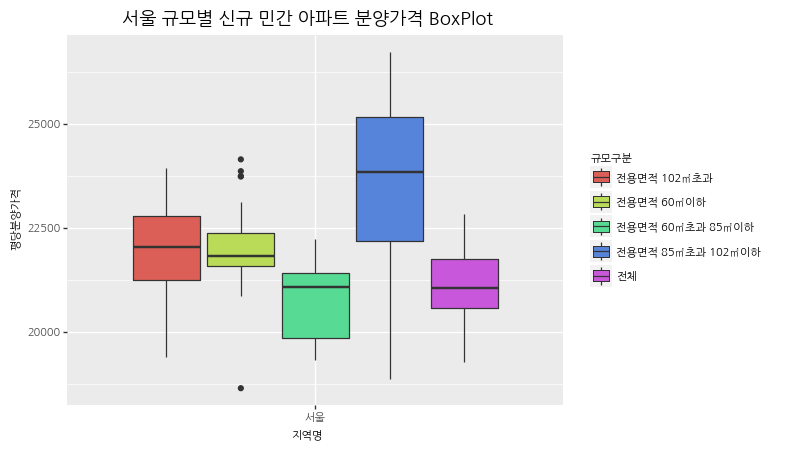

<ggplot: (179660999117)>

In [43]:
# 서울 지역 이상치 확인 시각화 ; BoxPlot
(ggplot(pre_sale.loc[pre_sale['지역명']=='서울'])
 + aes(x='지역명', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + ggtitle('서울 규모별 신규 민간 아파트 분양가격 BoxPlot')
 + theme(text=element_text(fontproperties=fontprop))
)

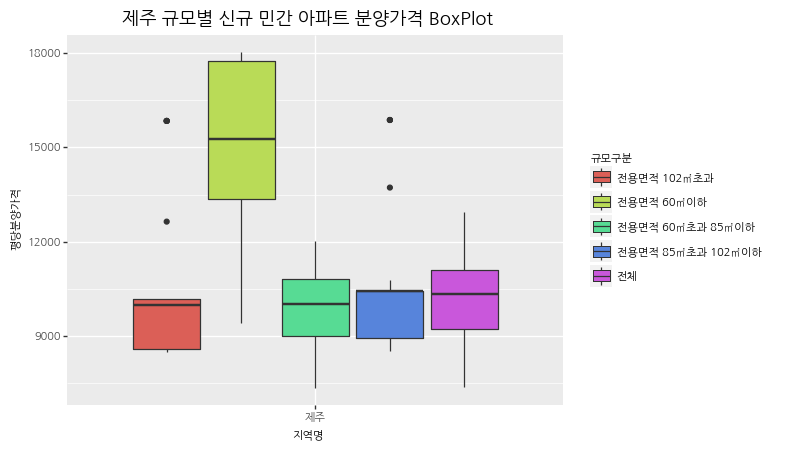

<ggplot: (179661534477)>

In [44]:
# 제주 지역 이상치 확인 시각화 ; BoxPlot
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='지역명', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + ggtitle('제주 규모별 신규 민간 아파트 분양가격 BoxPlot')
 + theme(text=element_text(fontproperties=fontprop))
)

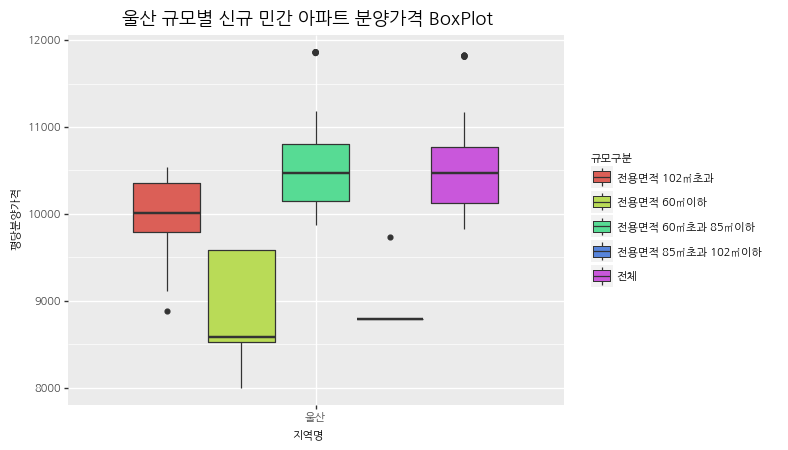

<ggplot: (179660999102)>

In [45]:
# 울산 지역 이상치 확인 시각화 ; BoxPlot
(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
 + aes(x='지역명', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + ggtitle('울산 규모별 신규 민간 아파트 분양가격 BoxPlot')
 + theme(text=element_text(fontproperties=fontprop))
)

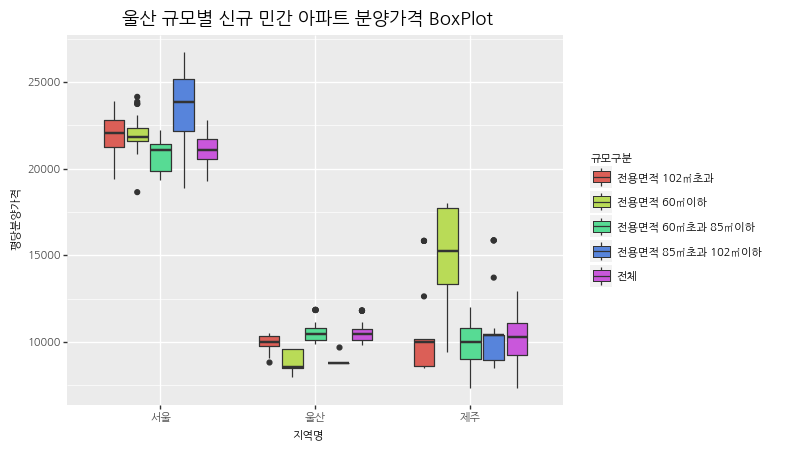

<ggplot: (179661479476)>

In [46]:
# 서울, 제주, 울산 지역 비교 이상치 확인 시각화 ; BoxPlot
(ggplot(pre_sale.loc[(pre_sale['지역명']=='서울') | (pre_sale['지역명']=='제주') | (pre_sale['지역명']=='울산')])
 + aes(x='지역명', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + ggtitle('울산 규모별 신규 민간 아파트 분양가격 BoxPlot')
 + theme(text=element_text(fontproperties=fontprop))
)

In [ ]:
# To CSV
df_to_csv = pre_sale[['지역명', '연도', '월', '평당분양가격']].loc[pre_sale['규모구분']=='전체']
df_to_csv.to_csv('2015-2018.csv', index=False)